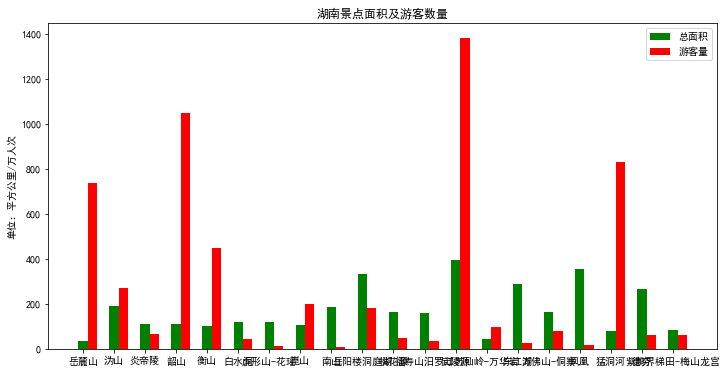

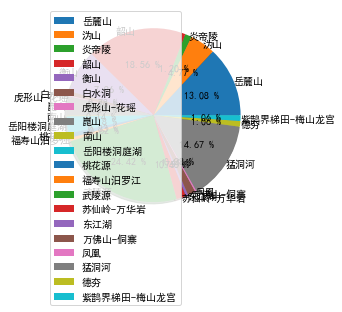

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取csv文件
scenery_file_path = open('./Data/风景名胜区.csv')
scenery_data = pd.read_csv(scenery_file_path)


# 通过groupby()函数按“省份”一列拆分data
data = scenery_data.groupby("省份")
# 显示“湖南”分组的数据
hunan_scenery = dict(x for x in data)['湖南']


# 计算 ”总面积（平方公里）“的平均数，并保留一位小数
area = float("{:.1f}".format(hunan_scenery['总面积(平方公里)'].mean()))
# 计算 ”游客量（万人次）“的平均数，并保留一位小数
tourist = float("{:.1f}".format(hunan_scenery['游客量(万人次)'].mean()))
# 将计算的平均值，使用fillna()函数，字典映射的形式进行填充
values = {'总面积(平方公里)':area, '游客量(万人次)':tourist}
hunan_scenery = hunan_scenery.fillna(value = values)
hunan_scenery.head()
# print(hunan_scenery)



plt.rcParams['font.sans-serif'] = ['SimHei'] # 正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False   # 正常显示负号
area = hunan_scenery['总面积(平方公里)'].values
tourist = hunan_scenery['游客量(万人次)'].values
# 设置尺寸
plt.figure(figsize=(12, 6))
x_num = range(0, len(area))
x_dis = [i + 0.3 for i in x_num]
plt.bar(x_num, area, color='g', width=.3, label='总面积')
plt.bar(x_dis, tourist, color='r', width=.3, label='游客量')
plt.ylabel('单位：平方公里/万人次')
plt.title('湖南景点面积及游客数量')
# 设置图例
plt.legend(loc='upper right')
plt.xticks(range(0, 20),['岳麓山', '沩山', '炎帝陵','韶山','衡山',
                         '白水洞','虎形山-花瑶','崑山','南山',
                         '岳阳楼洞庭湖','桃花源','福寿山汨罗江',
                         '武陵源','苏仙岭-万华岩','东江湖','万佛山-侗寨',
                         '凤凰','猛洞河','德夯','紫鹊界梯田-梅山龙宫'
                        ])
plt.show()


every_scenery = hunan_scenery['游客量(万人次)'].values
all_scenery = hunan_scenery['游客量(万人次)'].sum()
# 计算每个景点游客所占百分比 保留两位小数
percentage = (every_scenery/all_scenery)*100
np.set_printoptions(precision=2)
labels = ['岳麓山', '沩山', '炎帝陵','韶山','衡山',
          '白水洞','虎形山-花瑶','崑山','南山',
          '岳阳楼洞庭湖','桃花源','福寿山汨罗江',
          '武陵源','苏仙岭-万华岩','东江湖','万佛山-侗寨',
          '凤凰','猛洞河','德夯','紫鹊界梯田-梅山龙宫'
          ]
plt.axes(aspect=1)
plt.pie(x= percentage, labels=labels, autopct='%3.2f %%',shadow=True, labeldistance=1)
plt.legend(loc='upper left')
plt.show()

